@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/n2PpD7xnPoM

<h1 style="color:purple">Bosques de Aislamiento</h1>

<Figure size 640x480 with 0 Axes>

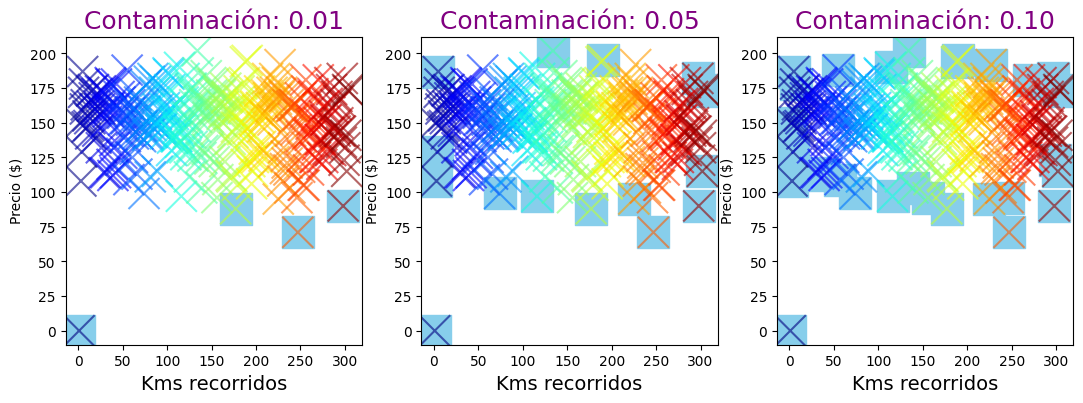

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Cargar datos
carros = np.loadtxt("Heart - copia.csv", delimiter=",")
resultados = np.zeros((3, carros.size//2))

# Bosques de Aislamiento con diferente contaminación
c = [0.01, 0.05, 0.1] 
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(carros)
    resultados[i] = modelo.predict(carros)
    
# Graficar datos anómalos 
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):    
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(carros[resultados[i]==-1][:, 0], 
               carros[resultados[i]==-1][:, 1], 
               c="skyblue", marker="s", s=500)
    ax.scatter(carros[:, 0], 
               carros[:, 1], 
               c=range(carros.size//2), marker="x",
               s=500, alpha=0.6)
    ax.set_title("Contaminación: %0.2f" % c[i], size=18, color="purple")
    ax.set_ylabel("Precio ($)", size=10)
    ax.set_xlabel("Kms recorridos", size=14)

plt.show()

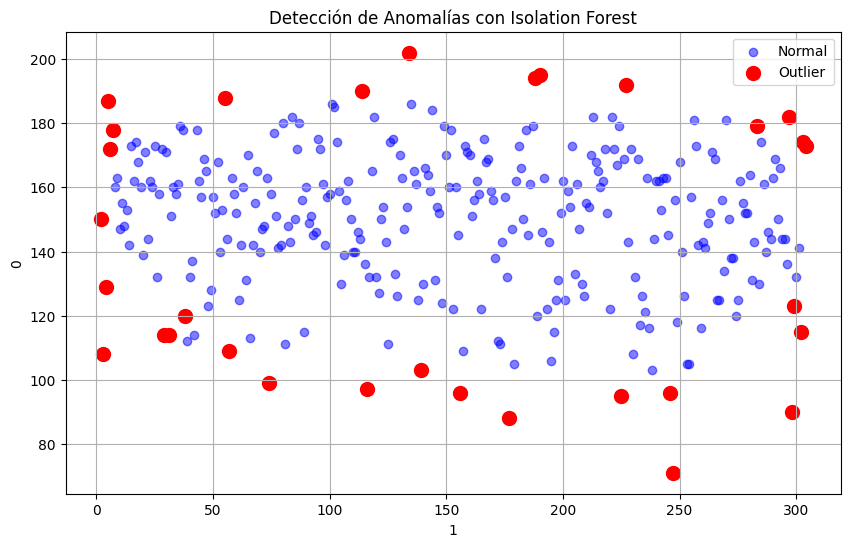

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# Cargar datos usando pandas
data = pd.read_csv("Heart - copia.csv")
X = data.values  # Convertir a numpy array

# Crear y ajustar el modelo
iso_forest = IsolationForest(contamination=0.1, random_state=42)
yhat = iso_forest.fit_predict(X)

# Crear la visualización
plt.figure(figsize=(10, 6))

# Graficar todos los puntos
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal', alpha=0.5)

# Resaltar los outliers en rojo
mask_outliers = yhat == -1
plt.scatter(X[mask_outliers, 0], X[mask_outliers, 1], 
           c='red', label='Outlier', s=100)

plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend()
plt.grid(True)
plt.show()

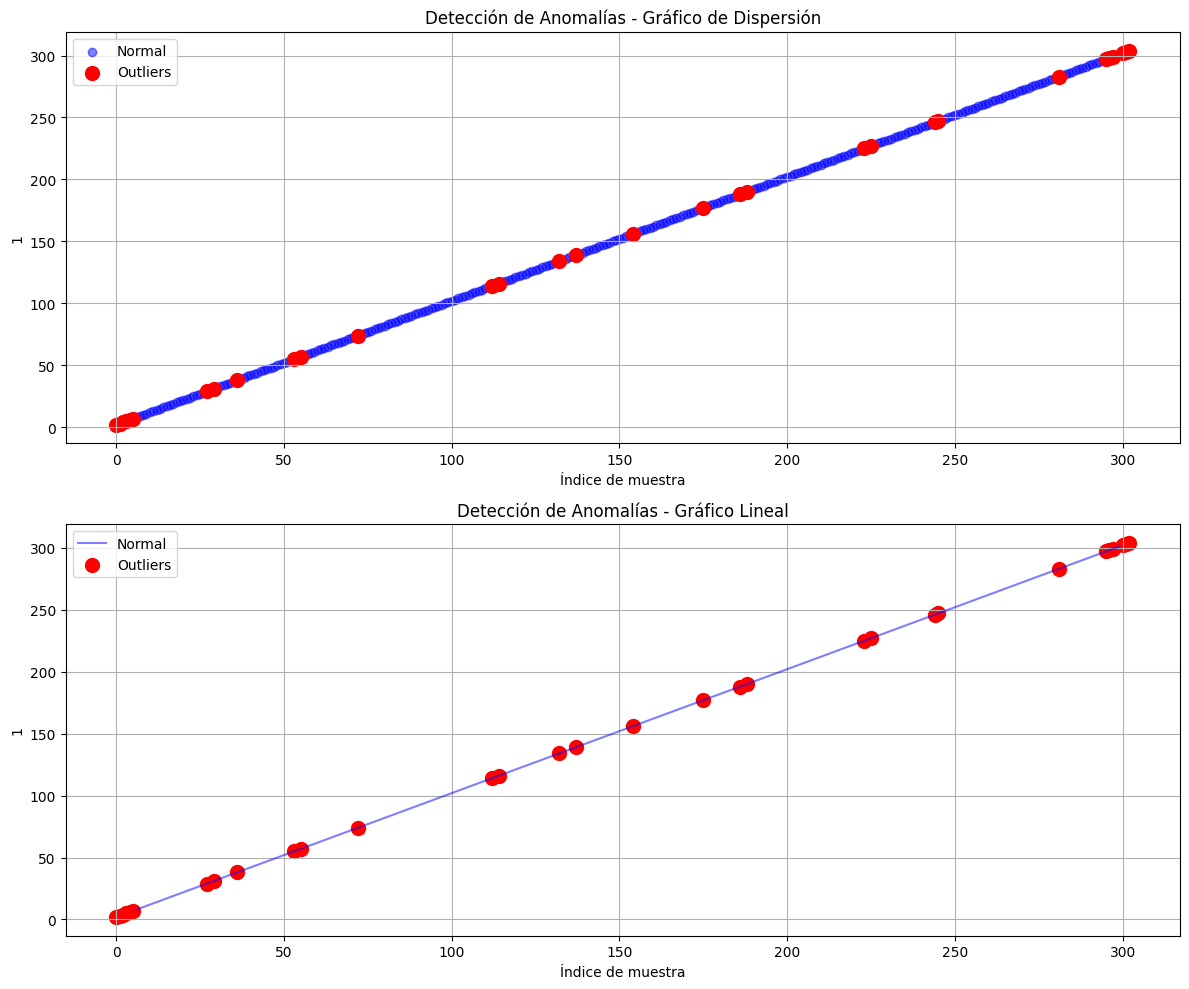

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# Cargar datos usando pandas
data = pd.read_csv("Heart - copia.csv")
X = data.values

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
yhat = iso_forest.fit_predict(X)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Crear array de índices
indices = np.arange(len(X))
mask_outliers = yhat == -1
mask_normal = yhat == 1

# 1. Gráfico de dispersión (scatter plot)
ax1.scatter(indices[mask_normal], X[mask_normal, 0], c='blue', label='Normal', alpha=0.5)
ax1.scatter(indices[mask_outliers], X[mask_outliers, 0], 
           c='red', label='Outliers', s=100)
ax1.set_title('Detección de Anomalías - Gráfico de Dispersión')
ax1.set_xlabel('Índice de muestra')
ax1.set_ylabel(data.columns[0])
ax1.legend()
ax1.grid(True)

# 2. Gráfico lineal
ax2.plot(indices[mask_normal], X[mask_normal, 0], 'b-', label='Normal', alpha=0.5)
ax2.scatter(indices[mask_outliers], X[mask_outliers, 0], 
           c='red', label='Outliers', s=100)
ax2.set_title('Detección de Anomalías - Gráfico Lineal')
ax2.set_xlabel('Índice de muestra')
ax2.set_ylabel(data.columns[0])
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()